# [Chapter 9](http://www.greenteapress.com/thinkbayes/html/thinkbayes010.html)
## Two Dimensions

### Paintball

![diagram for the paintball problem](http://www.greenteapress.com/thinkbayes/html/thinkbayes022.png)

In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

In [34]:
class Paintball(Suite, Joint):
    def __init__(self, alphas, betas, locations):
        self.locations = locations
        pairs = [(alpha, beta)
                 for alpha in alphas
                 for beta in betas]
        Suite.__init__(self, pairs)
        
    def Likelihood(self, data, hypo):
        alpha, beta = hypo
        x = data
        
        pmf = MakeLocationPmf(alpha, beta, self.locations)
        like = pmf.Prob(x)
        return like
    
    def Conditional(self, i, j, val):
        pmf = Pmf()
        for vs, prob in self.Items():
            if vs[j] == val:
                pmf[vs[i]] += prob
        pmf.Normalize()
        return pmf

def StrafingSpeed(alpha, beta, x):
    """
    alpha and beta are location of shooter
    x is location of spatter
    """
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    return speed

def MakeLocationPmf(alpha, beta, locations):
    pmf = Pmf()
    for x in locations:
        prob = 1.0 / StrafingSpeed(alpha, beta, x)
        pmf[x] = prob
    pmf.Normalize()
    return pmf

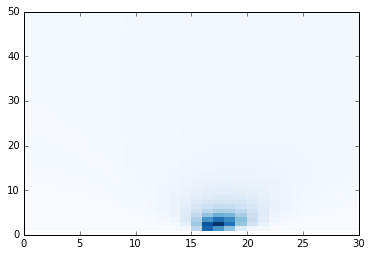

In [35]:
alphas = range(0, 31)
betas = range(1, 51)
locations = range(0, 31)

suite = Paintball(alphas, betas, locations)

suite.UpdateSet([15, 16, 18, 21])

thinkplot.Contour(suite, contour=False, pcolor=True)

### Joint distributions

In [36]:
marginal_alpha = suite.Marginal(0)
marginal_beta = suite.Marginal(1)

print('alpha CI {}'.format(marginal_alpha.CredibleInterval(50)))
print('beta  CI {}'.format(marginal_beta.CredibleInterval(50)))

alpha CI (14, 21)
beta  CI (5, 31)


### Conditional distributions

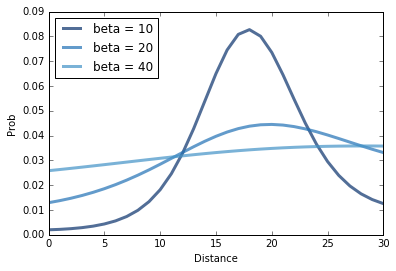

In [47]:
betas = [10, 20, 40]

for beta in betas:
    cond = suite.Conditional(0, 1, beta)
    thinkplot.Pdf(cond, label='beta = {}'.format(beta))

thinkplot.Config(
    legend=True,
    loc='top left',
    xlabel='Distance',
    ylabel='Prob'
)

### Credible Intervals

In [48]:
def MakeCrediblePlot(suite):
    d = dict((pair, 0) for pair in suite.Values())
    
    percentages = [75, 50, 25]
    for p in percentages:
        interval = suite.MaxLikeInterval(p)
        for pair in interval:
            d[pair] += 1
            
    return d

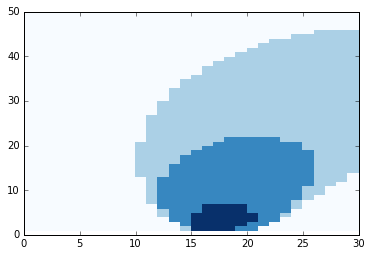

In [51]:
thinkplot.Contour(MakeCrediblePlot(suite), contour=False, pcolor=True)